# Algorithmen der Bioinformatik I - Blatt 2

Autoren: Niklas Müller, Robin William Hundt

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import glob

def plot_hist(path):   
    dataFile = open(path, 'r')
    # expecting per line: viterbipath;probability
    lines = dataFile.readlines()
    probabilities = [line.split(';')[1] for line in lines]
    probabilities = [float(probabilities[i][:len(probabilities[i])]) for i in range(len(probabilities))]

    n, bins, patches = plt.hist(probabilities, density=True)

    plt.title("Histogram of Viterbi-probabilities")
    plt.xlabel('Viterbi-Probability')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()
    
    
def plot_roc(path):
    dataFile = open(path, 'r')
    # expecting: first line: true positive rate
                #second line: false positive rate
    lines = dataFile.readlines()

    TPR = lines[0][1:len(lines[0])-2].split(',')
    TPR = [float(x) for x in TPR]
    FPR = lines[1][1:len(lines[1])-2].split(',')
    FPR = [float(x) for x in FPR]

    auc = np.trapz(TPR, FPR)

    plt.title("ROC-Curve with AUC value:" + str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot(FPR, TPR)
    plt.axis([0.0, 1.0, 0.0, 1.0])
    plt.show() 


## HMM zum unehrlichen Casino
Die Implementation des Viterbialgorithmus für ein normales HMM befindet sich in der `bioalgosviterbi/src/main/java/viterbi/Viterbi` Datei.

#### Stimmt der berechnete Pfad mit dem aus der Abbildung überein?
Ja, die Pfade stimme überein.  
In der Datei `bioalgosviterbi/src/test/java/viterbi/ViterbiTest` befindet sich ein JUnit Test zur Überprüfung der Übereinstimmung des generierten Pfades mit dem aus "Biological sequence analysis" Seite 57.

#### Welche Möglichkeit gäbe es, die Unsicherheit des Modells an bestimmten Stellen der Sequenz weiter zu untersuchen?
Um die Unsicherheit des Modells an bestimmten Stellen zu untersuchen könnte die posterior probability $P(\pi_i=k|x)$ genutzt werden. Diese gibt an wie wahrscheinlich es ist, dass die Observation $x_i$ aus dem state $k$ emittiert wurde, gegeben der gesamten emittierten Sequenz $x$.  
Betrachtet man nun den Viterbipfad könnte für jeden state die posterior probabilty berechnet werden. Ist diese klein weist dies auf eine Stelle der Sequenz hin an denen sich das Modell unsicher sein könnte.

#### Skizzieren  Sie  einen  allgemeinen  Algorithmus  zur  Markierung  von Sequenzpositionen, an denen das Modell bezüglich der Rekonstruktion (“Vorhersage”) der Zustände möglicherweise unzuverlässig ist.

Sei $M_{vit}$ unser Viterbimodell, $x$ die Observationen

$\pi_{vit}$ = calc_vit_path($M_{vit}, x$)
  
for k in $\pi_{vit}$:  
>    post_p = calc $P(\pi_i=k|x)$  
>    if post_p < threshold:  
>>        mark k  

Die threshold Variable is ein Hyperparameter, welcher im Vorfeld sinnvoll gewählt werden muss.

#### Was müssten Sie bei der Implementation insbesondere beachten, um numerisch sinnvolle Ergebnisse zu erhalten?

Es muss beachtet werden, dass sowohl in der Implementation des Viterbialgorithmus als auch in der des Back-/Forwardalgorithmus mit logarithmierten Wahrscheinlichkeiten gerechnet wird. Andernfalls führt die häufige Multiplikation von werden $<1$ schnell zu Werten welche nicht mehr durch normale Gleitkommazahlen dargestellt werden können.

### Profil-HMM zur Erkenunng ribosomaler RNA-Sequenzen

### Schätzen der Modellparameter

#### Gibt es Regionen auf der 23S rRNA mit relativ geringer Entropie, also Regionen in denen bestimmte Buchstaben (Basen)  deutlich  häufiger  vorkommen  als  andere?

#### Welche  Bedeutung haben  solche Regionen aus biologischer und statistischer Sicht?

### Anwendung auf Testsequenzen

#### Auf welcher taxonomichen Ebene des phylogenetischen Baums befindet sich das Phylum und was lässt sich über die Verwandtschaft von Organismen aus unterschiedlichen Phyla sagen?

#### Erzeugen Sie jeweils ein Histogramm der logarithmischen Scores für die 3 verschiedenen Testdateien.

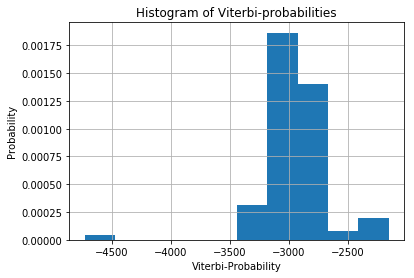

In [11]:
plot_hist("data/test_files/probabilities-LSU_test_1.fasta")

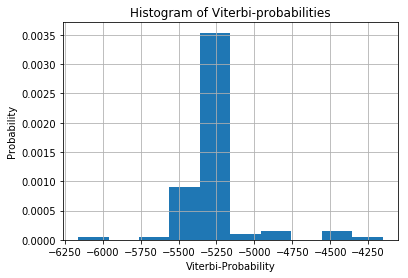

In [12]:
plot_hist("data/test_files/probabilities-LSU_test_2.fasta")

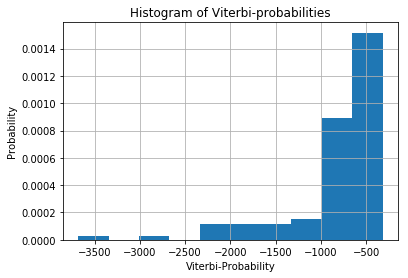

In [13]:
plot_hist("data/test_files/probabilities-LSU_test_3.fasta")

Wie wir sehen befinden sich die logarithmischen maximalen Verbundswahrscheinlichkeiten der ersten und zweiten Testdatei respektiv im Bereich -3000 und -5250.  
Die Wahrscheinlichkeiten der Sequenzen aus der dritten Datei bewegen sich hingegen hauptsächlich im Bereich von -1000 bis -300.

#### Geben Sie ihre Vermutung ab, um welchen Typ es sich jeweils handelt (in jeder Datei sind nur Sequenzen eines Typs) und begründen Sie diese Vermutung.

Vermutlich handelt es sich bei den Sequenzen mit den höchsten Scores (also denen aus Datei 3) um Testsequenzen des Phylumns Firmicutes. Da unsere Trainingssequenzen ebenfalls vom Phylum Firmicutes stammen, sollten die Sequenzen mit den höchsten Scores die vom Phylum Firmicutes sein.  
Bei den Sequenzen mit den niedrigsten Scores (also denen aus Datei 2) handelt es sich vermutlich um non-rRNA Sequenzen, da es sich hier um eine gänzlich andere Art von RNA handelt.  
Somit erschließt sich, dass die Sequenzen aus Datei 2 vom Phylum Proteobacteria stammen.

#### Für jede Parameter-Konfiguration und jedes Phylum erzeugen Sie bitte eine ROC-Kurve und fügen diese ihrem Protokoll bei.

Für die folgenden ROC curves wurde ein transition pseudocount von 1 verwendet falls nicht spezifiziert.

Short Firmicutes Daten mit emmission pseudocount von 1

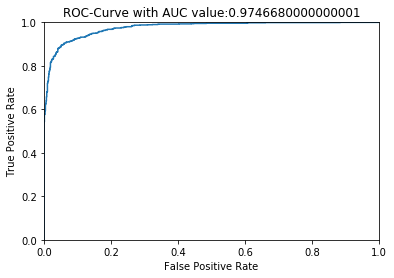

In [27]:
plot_roc("data/viterbiData-short-firm1/rocCurve/rocCurveData.txt")

Short Proteobacteria Daten mit emmission pseudocount von 1

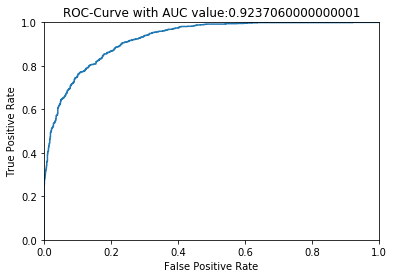

In [28]:
plot_roc("data/viterbiData-short-proteo1/rocCurve/rocCurveData.txt")

Short Firmicutes Daten mit emmission pseudocount von 100

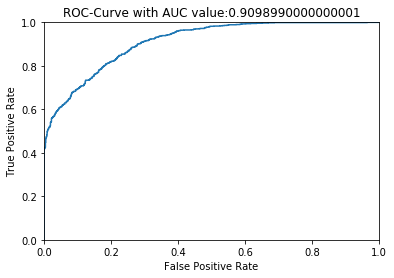

In [29]:
plot_roc("data/viterbiData-short-firm100/rocCurve/rocCurveData.txt")

Short Proteobacteria Daten mit emmission pseudocount von 100

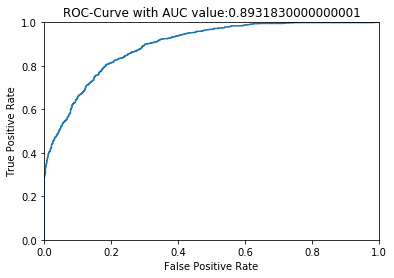

In [30]:
plot_roc("data/viterbiData-short-proteo100/rocCurve/rocCurveData.txt")

Short Firmicutes Daten mit emmission pseudocount von 1000

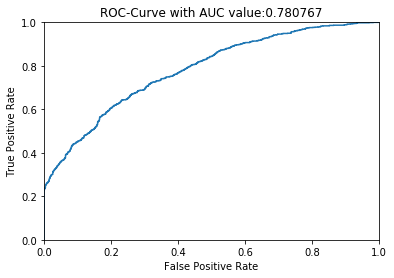

In [32]:
plot_roc("data/viterbiData-short-firm1000/rocCurve/rocCurveData.txt")

Short Proteobacteria Daten mit emmission pseudocount von 1000

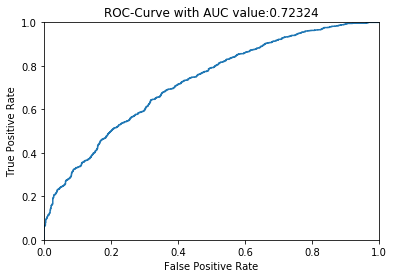

In [33]:
plot_roc("data/viterbiData-short-proteo1000/rocCurve/rocCurveData.txt")

Mit zunehmenden Emmissions Pseudocounts sinkt der AUC Wert der ROC-Kurven, unser Modell wird also schlechter. Die AUC Werte sind bei den Kurven in denen die Sequenzen des Phylums Firmicutes als positiv gelabelt werden durchgehend höher als wenn die des Phylums Proteobacteria als positiv bewertet werden.  
Dies ist zu erwarten, da die Trainingssequenzen ebenfalls vom Phylum Firmicutes stammen.

#### Setzen Sie nun die Emission-Pseudocounts auf 100 und die Transition-Pseudocounts (nur für Delete-Delete übergänge!) auf 200 (2 ROC-Kurven).

Short Firmicutes Daten mit emmission pseudocount von 100 und Delete-Delete pseudocounts von 200

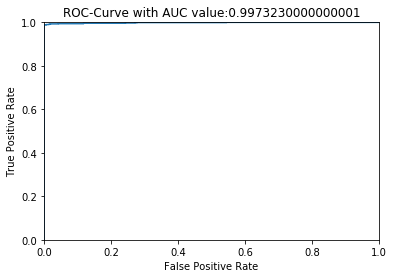

In [35]:
plot_roc("data/viterbiData-short-firm100-200/rocCurve/rocCurveData.txt")

Short Proteobacterius Daten mit emmission pseudocount von 100 und Delete-Delete pseudocounts von 200

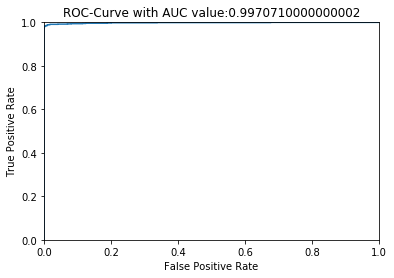

In [37]:
plot_roc("data/viterbiData-short-proteo-100-200/rocCurve/rocCurveData.txt")

#### Was ist zu beobachten? Wieso ist es sinnvoll, die Delete-Delete Pseudocounts zu modifizieren bzw. warum lässt sich so die Performanz auf kurzen Fragmenten verbessern?

#### Geben Sie als letztes den Viterbi-Pfad der 100. Testsequenz in LSU_short_f.fasta für veränderte Transition-Pseudocounts (1, 50, 200) aus und vergleichen Sie die Ergebnisse. Was fällt auf?

Es fällt auf, dass im Gegensatz zum Erhöhen der Delete-Delete Pseudocounts, das Erhöhen aller Transitions Pseudocounts zu einem schlechteren Ergebnis führt (zu erkennen an den abnehmenden Scores bei höhren Pseudocounts).

Transitions Pseudocount: 1 

In [42]:
!cat data/viterbiData-short-firm100th-1/probabilities-100thSequenceShortFirmicutes.fasta

MIDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD

Transitions Pseudocount: 50

In [43]:
!cat data/viterbiData-short-firm100th-50/probabilities-100thSequenceShortFirmicutes.fasta

MIDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMDDDDDDDDDMDDDDMDDDMDDDDDDDDDDDDDDDDDDDDDDDMMMDDDDDDDDDDDDDDDDDDDDDDDDDMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMMMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD

Transitions Pseudocount: 200

In [41]:
!cat data/viterbiData-short-firm100th-200/probabilities-100thSequenceShortFirmicutes.fasta

IDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMDDDDDDDDDMDDDDMDDDDDDDDDDDDDDDDDDDDDDMDDDDMMMDDDDDDDDDDDDDDDDDDDDDDDDDMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMMMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDMMDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD